<a href="https://colab.research.google.com/github/SaharshKhicha18/Solubility-Prediction-python/blob/main/CompDrugDiscovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing Conda **

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-06-04 06:57:25--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   157MB/s    in 0.5s    

2021-06-04 06:57:26 (157 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

**Importing rdkit library**

In [ ]:
! conda install -c rdkit rdkit -y

Solving environment: - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    ca-certificates-2021.5.25  |       h06a4308_1         112 KB
    cairo-1.16.0               |       hf32fb01_1         1.0 MB
    certifi-2021.5.30          |   py37h06a4308_0         139 KB
    conda-4.10.1               |   py37h06a4308_1         2.9 MB
    fontconfig-2.13.1          |       h6c09931_0         250 KB
    freetype-2.10.4            |       h5ab3b9f_0         596 KB
    glib-2.68.2                |       h36276a3_0         3.0 MB
    icu-58.2                   |       he6710b0_3        10.5 MB
    intel-openmp-2021.2.0      |    

In [ ]:
import rdkit 

**Dataset**

In [ ]:
! wget https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt

--2021-06-04 06:58:47--  https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt
Resolving pubs.acs.org (pubs.acs.org)... 104.18.1.20, 104.18.0.20
Connecting to pubs.acs.org (pubs.acs.org)|104.18.1.20|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt?cookieSet=1 [following]
--2021-06-04 06:58:47--  https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt?cookieSet=1
Reusing existing connection to pubs.acs.org:443.
HTTP request sent, awaiting response... 302 Found
Location: https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt [following]
--2021-06-04 06:58:47--  https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt
Reusing existing connection to pubs.acs.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 60034 (59K

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('ci034243xsi20040112_053635.txt')
data

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


**Simplified Molecular Input-Line Entry System data **

In [ ]:
data.SMILES

0                                    ClCC(Cl)(Cl)Cl
1                                      CC(Cl)(Cl)Cl
2                                    ClC(Cl)C(Cl)Cl
3                                        ClCC(Cl)Cl
4                               FC(F)(Cl)C(F)(Cl)Cl
                           ...                     
1139                   CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140          CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141         CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O 
1142    Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O
1143                         CNC(=O)Oc1cc(C)cc(C)c1
Name: SMILES, Length: 1144, dtype: object

**Convert SMILES to rdkit object**

In [ ]:
from rdkit import Chem

In [ ]:
rdlist = []
for i in data.SMILES:
  x= Chem.MolFromSmiles(i)
  rdlist.append(x)


**Calculation of the Molecular Descriptors used in the study**

To predict LogS (log of the aqueous solubility), the study by Delaney makes use of 4 molecular descriptors:

cLogP (Octanol-water partition coefficient)

MW (Molecular weight)

RB (Number of rotatable bonds)

AP (Aromatic proportion = number of aromatic atoms / total number of heavy atoms)

Unfortunately, rdkit readily computes the first 3. AP descriptor will be computed manually by the ratio of the number of aromatic atoms to the total number of heavy atoms which rdkit can compute.

In [ ]:
import numpy as np
from rdkit.Chem import Descriptors

In [ ]:
def generate(smiles, verbose=False):

    moldescdata= [] #convert the smiles into rdkit object
    for i in smiles:
        x=Chem.MolFromSmiles(i) 
        moldescdata.append(x)
       
    baseData= np.arange(1,1)
    j=0  
    for x in moldescdata:        
       
        d_MolLogP = Descriptors.MolLogP(x)
        d_MolWt = Descriptors.MolWt(x)
        d_NumRotatableBonds = Descriptors.NumRotatableBonds(x)
           
        row = np.array([d_MolLogP, d_MolWt, d_NumRotatableBonds])   #numpy array for the arrangement of 3 MD
    
        if(j==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        j = j+1     
    
    columnNames=["MolLogP","MolWt","NumRotatableBonds"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames) #pandas data frame 
    
    return descriptors

In [ ]:
desc3 = generate(data.SMILES)
desc3

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


**Molecular Descriptor Aromatic Proportion (AP)**

**  (a) Number of Aromatic Atoms **

In [ ]:
def AromaticAtoms(x):
  is_aromatic = [x.GetAtomWithIdx(i).GetIsAromatic() for i in range(x.GetNumAtoms())]
  count = 0
  for i in is_aromatic:
    if i == True:
      count =count +1
  return count


In [ ]:
d_aromaticatoms = []
for i in rdlist:
  d_aromaticatoms.append(AromaticAtoms(i))
d_aromaticatoms

**  (b) Number of heavy atoms**

In [ ]:
d_heavyatoms = []
for i in rdlist:
  d_heavyatoms.append(Descriptors.HeavyAtomCount(i))
d_heavyatoms

**  AP = AromaticAtoms/HeavyAtoms**

In [ ]:
d_AP = []
for i in rdlist:
  d_AP.append(AromaticAtoms(i)/Descriptors.HeavyAtomCount(i))
d_AP

**Now that we have calculated all the 4 descriptors in order to predict the solubility, we will concatenate all the descriptors data in one table**

In [ ]:
df_d_AP = pd.DataFrame(d_AP,columns = ['AromaticProportion'])
df_d_AP

In [ ]:
X_desc4 = pd.concat([desc3,df_d_AP], axis = 1)
X_desc4

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


**Y Matrix (that has to be predicted by the X matrix values)**

In [ ]:
Y = data.iloc[:,1]
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: measured log(solubility:mol/L), Length: 1144, dtype: float64

**Data Spliting and generating a linear regression model**

   (A) First Train and Test split and linear regression 
   
   (B) Second Full dataset linear regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_desc4, Y, test_size=0.3) #30% test size

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
regressmodel = linear_model.LinearRegression()
regressmodel.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Prediction of the Xtrain - For comparitive purposes

In [ ]:
YPredicttrain = regressmodel.predict(Xtrain)
print("Coefficients = ", regressmodel.coef_)
print("Intercept = ", regressmodel.intercept_)
print("Mean squared error = %.3f" % mean_squared_error(Ytrain, YPredicttrain))
print("Pearsons Correlation coeffcient squared (R^2) = %.3f" % r2_score(Ytrain, YPredicttrain)) #Coeffcient of determination

Coefficients =  [-0.72002698 -0.00687682  0.01578578 -0.42756753]
Intercept =  0.21739022627075677
Mean squared error = 0.987
Pearsons Correlation coeffcient squared (R^2) = 0.772


Prediction of Xtest - for comparitive purposes

In [ ]:
YPredicttest = regressmodel.predict(Xtest)
print("Coefficients = " + regressmodel.coef_)
print("Intercept = " + regressmodel.intercept_)
print("Mean squared error = %.3f" % mean_squared_error(Ytest, YPredicttest))
print("Pearsons Correlation coeffcient squared (R^2) = %.3f" % r2_score(Ytest, YPredicttest)) #Coeffcient of determination

Coefficients =  [-0.72002698 -0.00687682  0.01578578 -0.42756753]
Intercept =  0.21739022627075677
Mean squared error = 1.071
Pearsons Correlation coeffcient squared (R^2) = 0.764


# Linear regression Equation

Full Dataset model

LogS = 0.22 (Y-intercept) - 0.72LogP - 0.0069MW + 0.0158RB - 0.428AP

4 Descriptors and the numbers are the regression coeffcients

In [ ]:
print("LogS = %.3f %.3f LogP %.3f MW %.3f RB %.3f AP" %(regressmodel.intercept_, regressmodel.coef_[0], regressmodel.coef_[1], regressmodel.coef_[2], regressmodel.coef_[3]))

LogS = 0.217 -0.720 LogP -0.007 MW 0.016 RB -0.428 AP


Scatter plot of the predicted value vs the experimental value

In [ ]:
import matplotlib.pyplot as plot

In [ ]:
Ytrain.shape, YPredicttrain.shape, Ytest.shape, YPredicttest.shape

((800,), (800,), (344,), (344,))

# Horizontal Plot

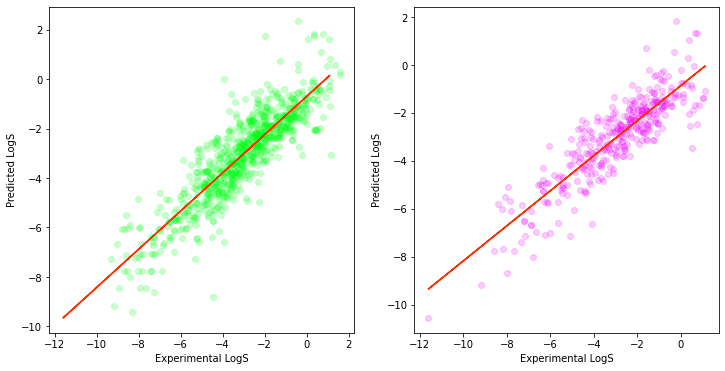

In [ ]:
plot.figure(figsize = (12, 6))

#Plot 1
plot.subplot(1, 2, 1) #2 rows for 2 graphs, 1 column and first graph
plot.scatter(x = Ytrain, y = YPredicttrain, c = "#00FF13", alpha = 0.2)

#Add trendline
fit = np.polyfit(Ytrain, YPredicttrain, 1)
trend = np.poly1d(fit)
plot.plot(Ytest, trend(Ytest), "#FF2D00")

#Add axis labels
plot.xlabel("Experimental LogS")
plot.ylabel("Predicted LogS")

#Plot 2
plot.subplot(1, 2, 2)
plot.scatter(x = Ytest, y = YPredicttest, c = "#F000FF", alpha = 0.2)

fit = np.polyfit(Ytest, YPredicttest, 1)
trend = np.poly1d(fit)
plot.plot(Ytest, trend(Ytest), "#FF2D00")

plot.xlabel("Experimental LogS")
plot.ylabel("Predicted LogS")

plot.savefig("Verticalplot.pdf")
plot.show()